## Load necessary libraries

In [91]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from tools import (
    relu,
    sigmoid,
    mean_square_error,
    initialize_parameter_deep
)

## View data

### load random forest dataset

In [92]:
N = 1000
gaussian_quantities = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

In [93]:
X, Y = gaussian_quantities
Y = Y[:, np.newaxis]

[]

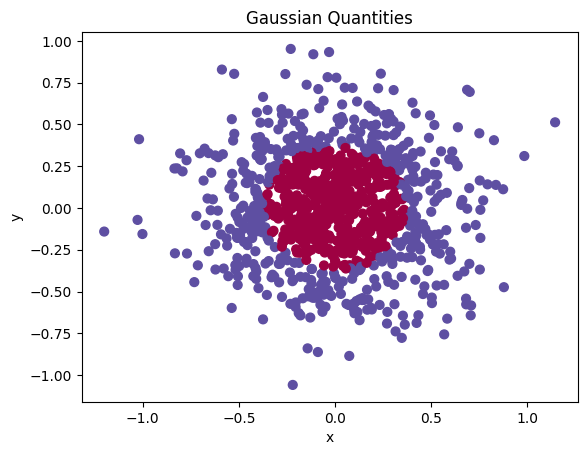

In [94]:
plt.grid()
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Quantities')
plt.grid(False)
plt.plot()

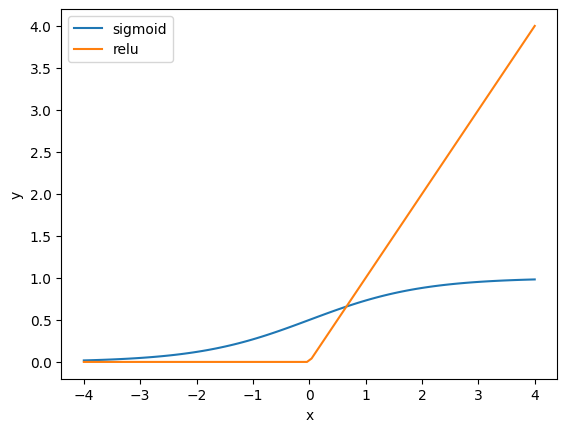

In [95]:
test = np.linspace(4,-4,100)
plt.plot(test, sigmoid(test), label='sigmoid')
plt.plot(test, relu(test), label='relu')
plt.legend()
plt.grid(False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Losses function

In [96]:
layer_dim = [2, 4, 8, 1]

params = initialize_parameter_deep(layer_dim)
params

{'W1': array([[-0.45997899, -0.92580468,  0.63669866,  0.67085715],
        [ 0.3148879 , -0.33552364,  0.67699403,  0.46352995]]),
 'b1': array([[-0.13896302,  0.97954059,  0.67636316, -0.64984305]]),
 'W2': array([[-0.6001032 , -0.09671673, -0.77941712,  0.13603706, -0.10499601,
          0.11535031,  0.41203483, -0.91503735],
        [-0.48026346, -0.68534286, -0.0319162 ,  0.68167585, -0.35181196,
         -0.36621859, -0.829814  ,  0.56343013],
        [ 0.28975979, -0.39635804, -0.18229935,  0.14015439, -0.74482495,
         -0.10502386,  0.51214868,  0.16887054],
        [ 0.08144754, -0.97133502, -0.47457398,  0.21525736,  0.40477412,
          0.29058326, -0.20264784,  0.16287323]]),
 'b2': array([[ 0.19164334, -0.31997132,  0.79377486,  0.90482264, -0.55878624,
         -0.23268197, -0.08865555,  0.33327754]]),
 'W3': array([[ 0.96955399],
        [-0.42408178],
        [-0.53437155],
        [-0.00972857],
        [-0.58017949],
        [-0.81592807],
        [ 0.40848107],


### Gradient descent

In [97]:
LEARNING_RATE = 0.001

In [98]:
def Train(x_data, lr, params, y,  training=True): 
    '''
        
    '''


    params['A0'] = x_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mean_square_error(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output


    params['A0'] = x_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']



In [99]:
layer_dim = [2, 4, 8, 1]

params = initialize_parameter_deep(layer_dim)

errors = []

for _ in range(50_000):
    output = Train(params=params, x_data=X, y=Y, lr=0.001)

    if _ % 25 == 0:
        error = mean_square_error(Y, output)
        print(error)
        errors.append(error)


0.2613536595796144
0.2436523896028895
0.23862094087271177
0.23557274492522765
0.23277644071876075
0.23023465537125104
0.22792056598990051
0.2258411757890521
0.2238607366138423
0.22189469836401832
0.21980353261775007
0.21741034789497363
0.21438504283341195
0.21007828496678974
0.20356679334805788
0.19506202692509128
0.18833435714167446
0.1841738802596156
0.18186550548220834
0.18039069905572022
0.1793780284257807
0.17875394685049098
0.178401881375429
0.1781590227863785
0.17794164469465348
0.17760348793197728
0.17734134287334766
0.17711219660099237
0.17669394584421316
0.17623963704710538
0.17601441512599325
0.1757679022267969
0.17552679755320094
0.1753119082737934
0.1749631195305862
0.17451542699450184
0.17415513507656738
0.1737580425552873
0.17340311162126873
0.17302112381620322
0.1726142870550094
0.17221138365429636
0.1716947360420154
0.17121087106922936
0.17077663032833293
0.17029422458727522
0.16979184770197708
0.16928731999063254
0.1687736555706843
0.16831578375093528
0.16775072840691

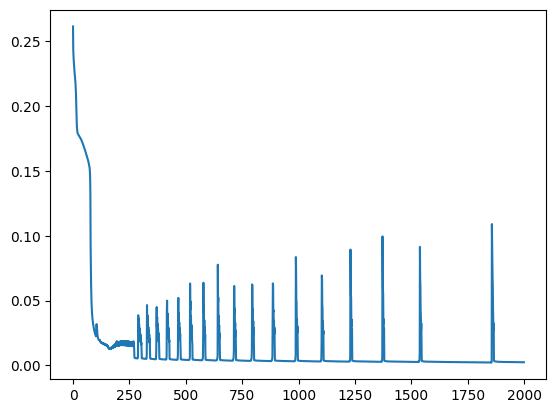

In [100]:
plt.plot(errors)
plt.show()

In [101]:
data_test = np.random.rand(1000, 2) * 2 - 1
y = Train(params=params, x_data=data_test, lr=0.001, y=Y, training=False)

[]

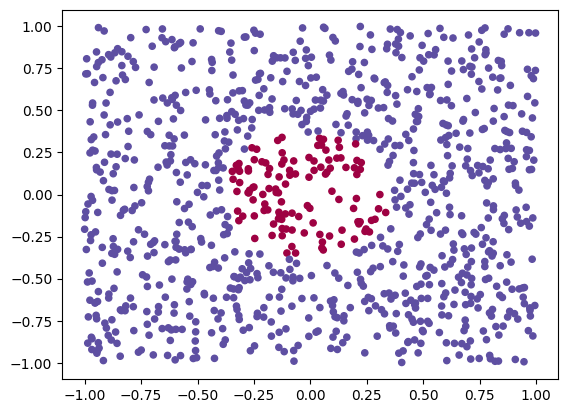

In [102]:
y = np.where(y > 0.5, 1, 0)
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=20, cmap=plt.cm.Spectral)

plt.plot()